In [1]:
# Standard Imports and Extensions  
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16.0, 10.0)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.core.display import display as core_display, HTML
core_display(HTML("<style>.container { width:60% !important; }</style>"))

In [2]:
# Simple STL plotting utility  

def stl_plot(stl):

    """
    Plot components of STL decomposition using matplotlib

    :param data: array_like - Raw data that was fit with STL
    :param time: array_like - Time coordinate for raw data values
    :param stl_decomposition: -
    """
    fig, axes = plt.subplots(4, 1)

    for i in xrange(3):
        axes[i].xaxis.set_visible(False)

    axes[0].set_ylabel("observations")
    axes[1].set_ylabel("trend")
    axes[2].set_ylabel("seasonal")
    axes[3].set_ylabel("residual")

    _ = axes[0].plot(stl.data)
    _ = axes[1].plot(stl.trend)
    _ = axes[2].plot(stl.seasonal)
    _ = axes[3].plot(stl.residual)


In [15]:
columns = ["data", "seasonal", "trend", "residual"]
time = pd.date_range('3/1/1958 00:00:00', periods=708, freq='M')

stl_java = pd.read_csv("output.csv", header=None)
stl_java.columns = columns
stl_java.index = time

stl_fortran = pd.read_csv("fortran_benchmark/output.csv", header=None)
stl_fortran.columns = columns
stl_fortran.index = time

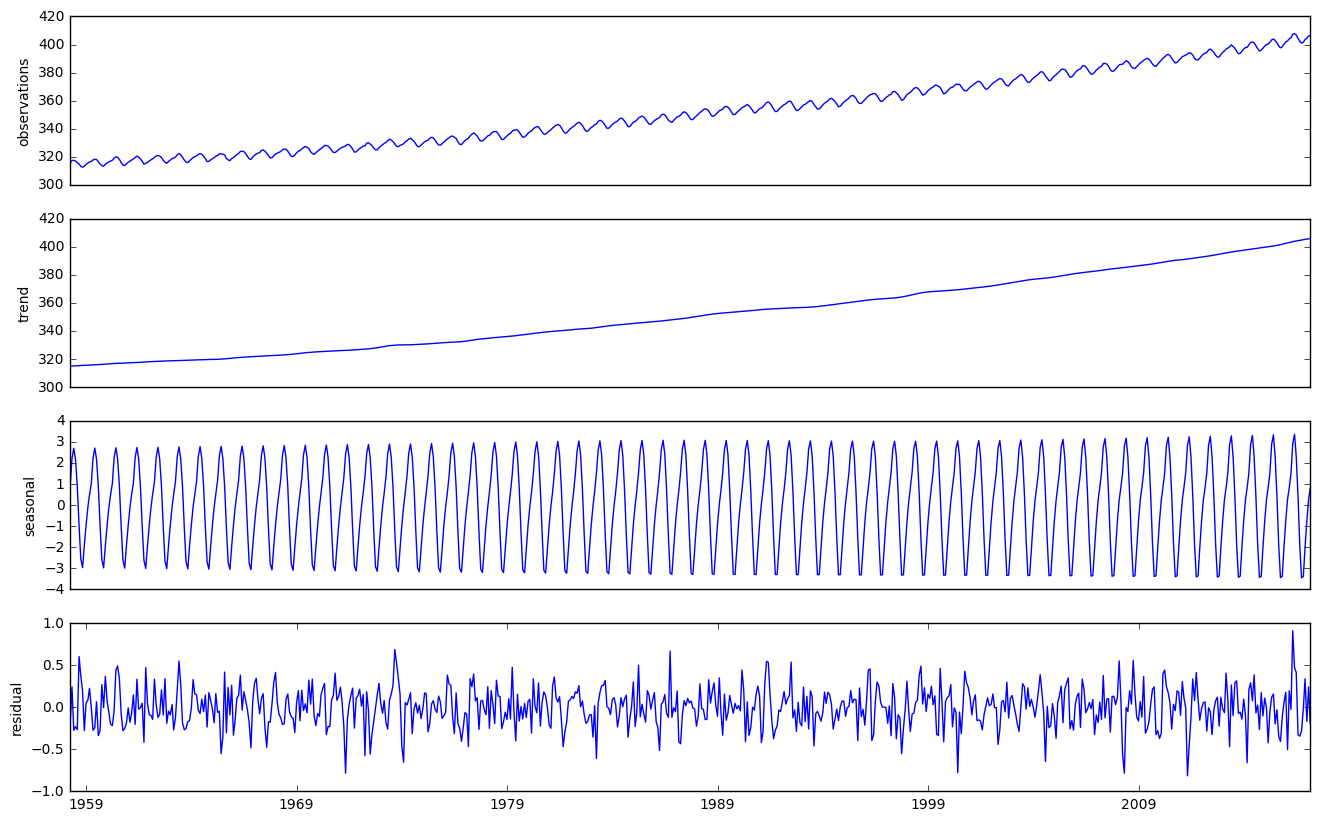

In [16]:
stl_plot(stl_java)

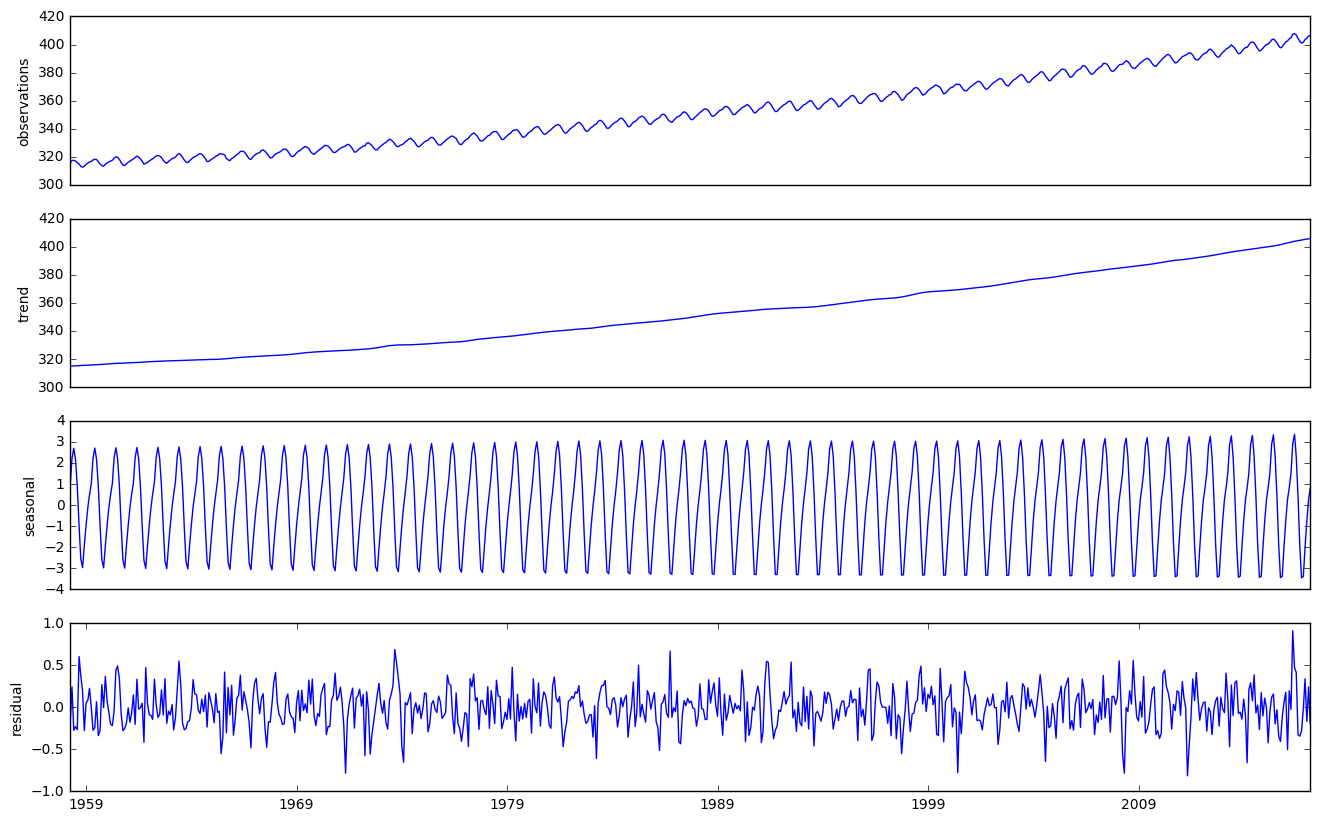

In [17]:
stl_plot(stl_fortran)

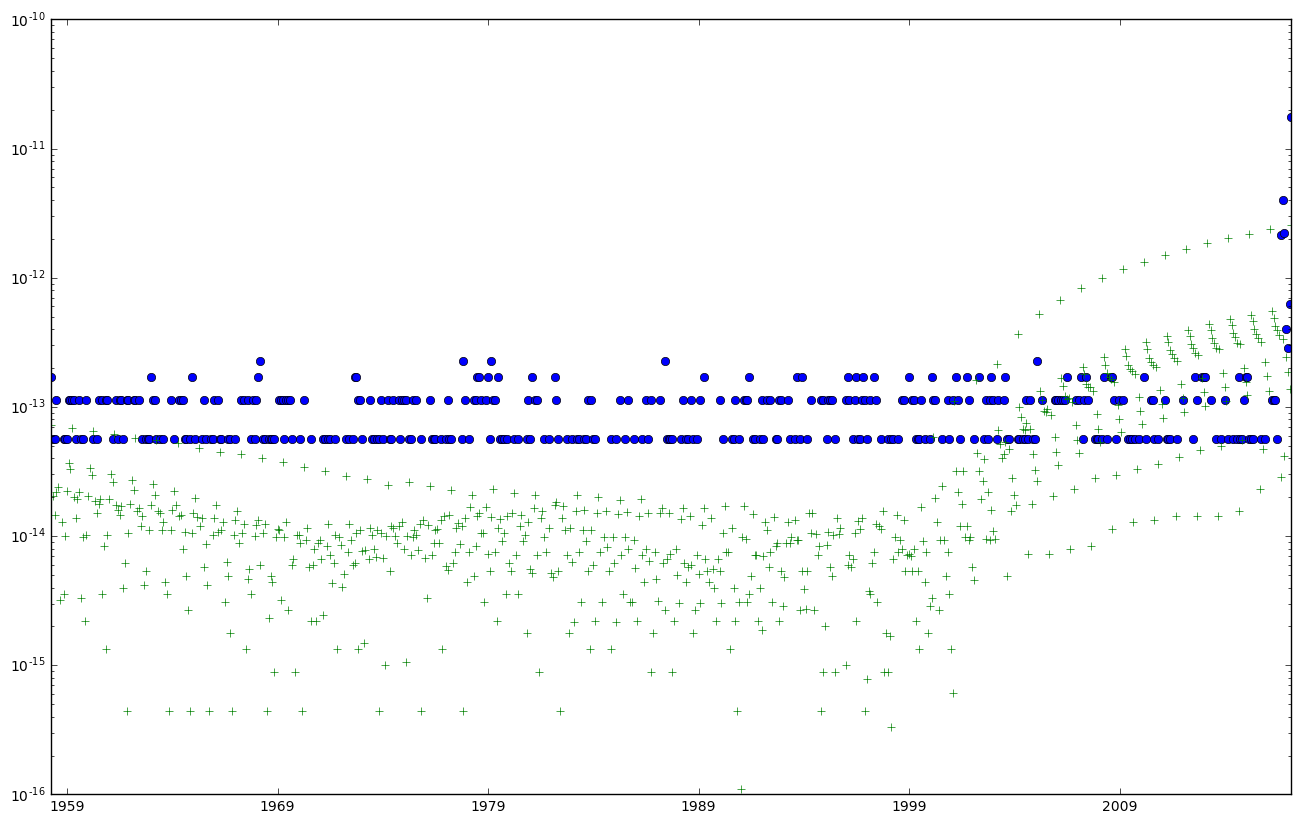

In [18]:
plt.semilogy(np.abs(stl_java.trend - stl_fortran.trend), "bo")
plt.semilogy(np.abs(stl_java.seasonal - stl_fortran.seasonal), "g+")